In [3]:
#!pip3 install shapely

import json
import requests
r = requests.get("https://www.geoboundaries.org/gbRequest.html?ISO=YEM&ADM=ADM2")

#Zipfile URL:
dlPath = r.json()[0]['downloadURL']

#You can swap .zip for .geojson for direct access to the geometry.
#Alternatively, you can skip this, download the *.zip, extract it locally,
#then load in the shape file.
#Dan is writing something.
dlPath = dlPath.replace("-all.zip", ".geojson")
geoBoundary = requests.get(dlPath).json()
print(geoBoundary["features"][1]["geometry"])
print("chicken")

     |████████████████████████████████| 1.8MB 4.6MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.
{'type': 'MultiPolygon', 'coordinates': [[[[44.4787189, 14.2964872], [44.4736883, 14.2946972], [44.4732761, 14.2945505], [44.4728599, 14.2916624], [44.4728526, 14.2916117], [44.4720016, 14.2857063], [44.4720251, 14.2756025], [44.4694525, 14.268018], [44.4694524, 14.2680178], [44.4553027, 14.2679915], [44.4553026, 14.2679915], [44.4552774, 14.2644073], [44.4552316, 14.2578819], [44.4552314, 14.2578818], [44.4506241, 14.2558716], [44.4470056, 14.2542928], [44.4435888, 14.252802], [44.4332292, 14.2527777], [44.4254597, 14.252759], [44.4181079, 14.2503397], [44.4075414, 14.2468817], [44.4021704, 14.245124], [44.401262, 14.2433403], [44.3970177, 14.2350062], [44.395097, 14.2318658], [44.3931499, 14.2286821], [44.3925026, 14.2286805], [44.3925027, 14.2286801], [44.3939308, 14.2240797], [44.3944616, 14.22237], [44.3946362, 14.2216961], [44.3957699, 14.21

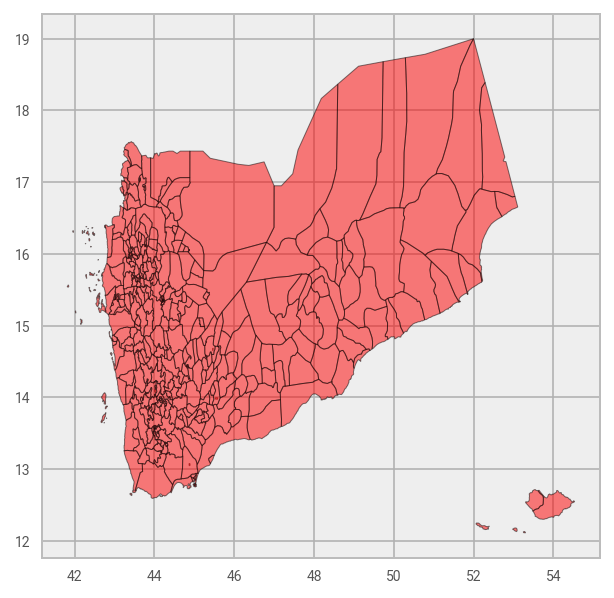

In [4]:
from matplotlib import pyplot as plt
from shapely.geometry import shape

geoBoundary["features"][1]["geometry"]

#Matplotlib Visualization
fig = plt.figure(1, figsize=(5,5), dpi=90)
axs = fig.add_subplot(111)

#Accounting for Multipolygon Boundaries
for boundary in geoBoundary["features"]:
  if(boundary["geometry"]['type'] == "MultiPolygon"):
    polys = list(shape(boundary["geometry"]))
    for poly in polys:
      xs, ys = poly.exterior.xy    
      axs.fill(xs, ys, alpha=0.5, fc='red', ec='black')
  else:
      xs, ys = shape(boundary["geometry"]).exterior.xy    
      axs.fill(xs, ys, alpha=0.5, fc='red', ec='black')

fig.savefig("example.png")
